In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

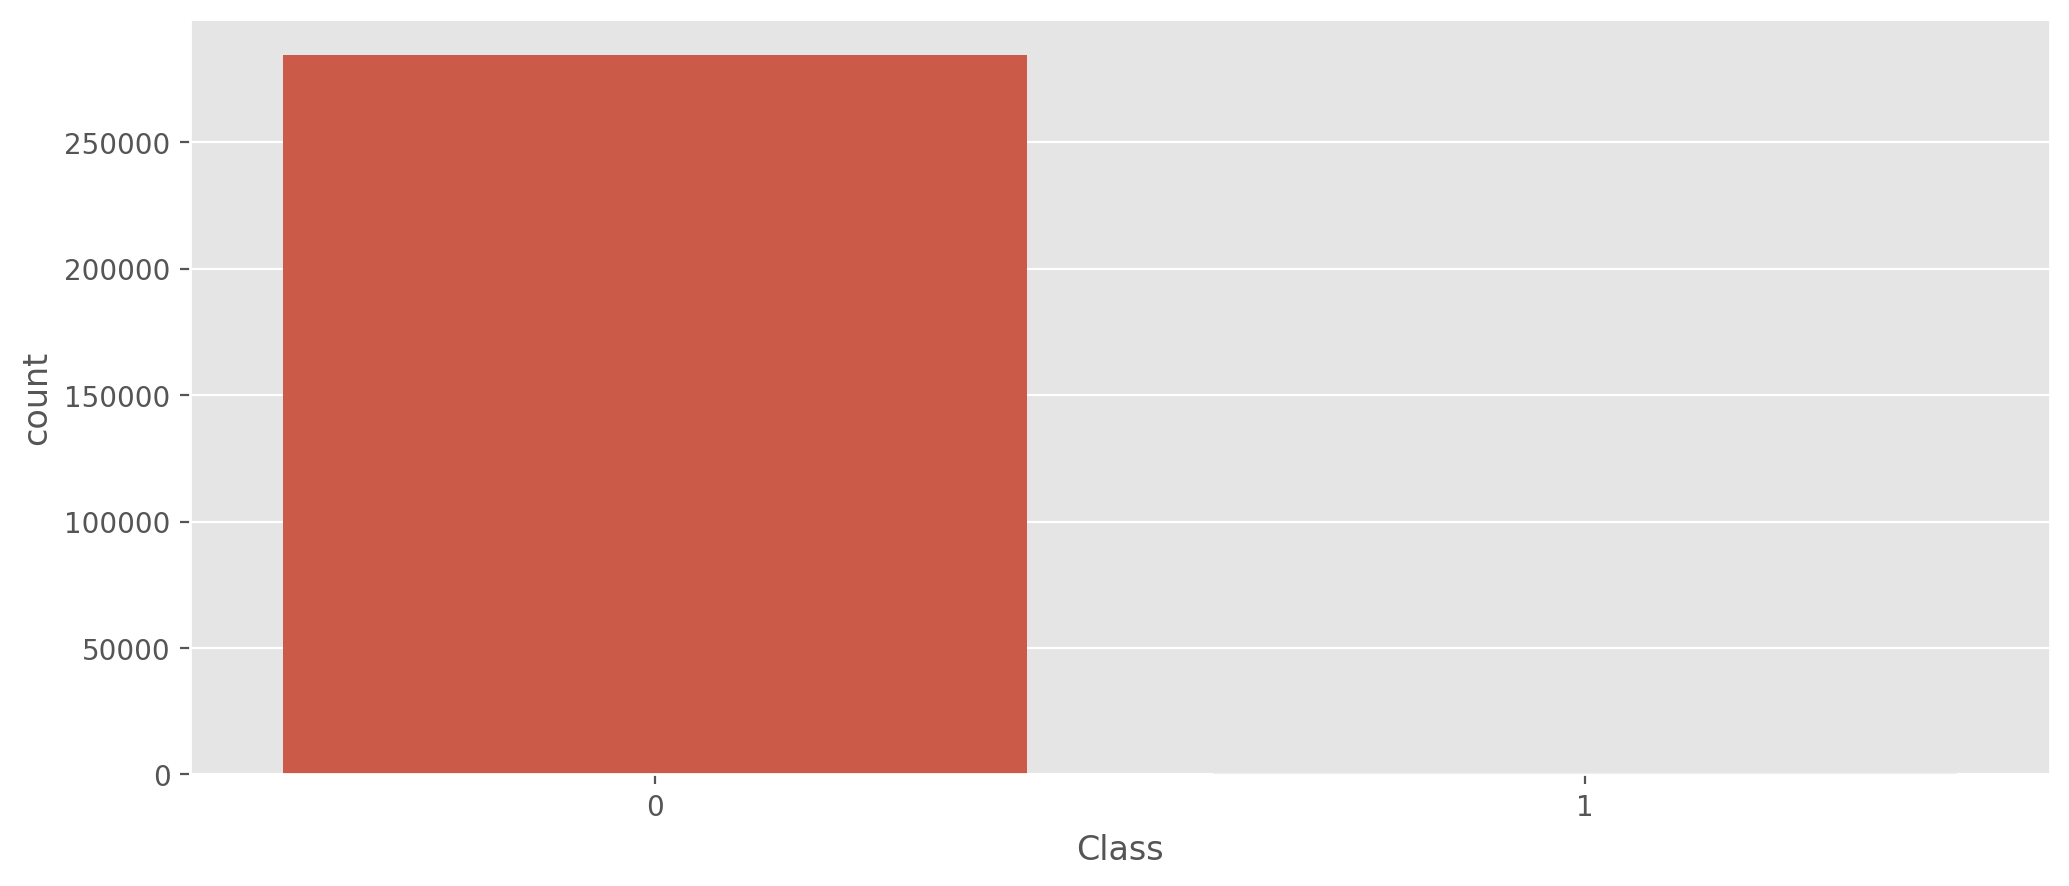

In [35]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(df.Class)

In [36]:
print('Classes : ', df.Class.unique())

Classes :  [0 1]


In [37]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [38]:
class_ratio = df.Class.value_counts(normalize = True)
print('Percentage of Fraudulent Transactions     : ', np.round(class_ratio[1] * 100,2), '%')
print('Percentage of non Traudulent Transactions : ', np.round(class_ratio[0] * 100, 2), '%')

Percentage of Fraudulent Transactions     :  0.17 %
Percentage of non Traudulent Transactions :  99.83 %


In [39]:
X = df.drop('Class', axis = 1)
Y = df[['Class']]

In [40]:
from imblearn.under_sampling import NearMiss
sampler = NearMiss()
x_sampled, y_sampled = sampler.fit_resample(X, Y)

In [41]:
print(x_sampled.shape)
print(y_sampled.shape)

(984, 30)
(984, 1)


In [42]:
pd.DataFrame(y_sampled).value_counts()

Class
0        492
1        492
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)

In [44]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (787, 30)
Training Labels Shape :  (787, 1)
Testing Data Shape    :  (197, 30)
Testing Labels Shape  :  (197, 1)


# Random forests
RandomForestClassifier(
>     bootstrap=True, class_weight=None, criterion='entropy',
      max_depth=10, max_features='auto', max_leaf_nodes=None,
      min_impurity_decrease=0.0, min_impurity_split=None,
      min_samples_leaf=1, min_samples_split=2,
      min_weight_fraction_leaf=0.0, n_estimators=10,
      n_jobs=None, oob_score=False, random_state=14,verbose=0,
      warm_start=False)

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, max_depth = 3, max_features = 15, criterion = 'entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=15,
                       n_estimators=10)

In [46]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [47]:
print('Training Set Accuracy Score : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy Score  : ', accuracy_score(y_test, pred_test))
print('\n')
print('Training Set F1 Score : ', f1_score(y_train, pred_train))
print('Testing Set F1 Score  : ', f1_score(y_test, pred_test))

Training Set Accuracy Score :  0.9606099110546379
Testing Set Accuracy Score  :  0.934010152284264


Training Set F1 Score :  0.958611481975968
Testing Set F1 Score  :  0.9326424870466321


# Hyperparameter Tuning
## 1. Grid SearchCV

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [48]:
search_params = {
    'n_estimators' : [5,10,30],
    'max_depth'    : [2,3,5],
    'max_features' : [15,20,25],
    'criterion'    : ['gini', 'entropy']
}

In [49]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = search_params,
                           scoring = ['f1'],
                           cv = 5,
                           refit = 'f1',
                           verbose = 3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.946) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.953) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.967) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.925) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.918) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=10; f1: (test=0.939) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=10; f1: (test=0.946) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=10; f1: (test=0.940) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_f

[CV 4/5] END criterion=gini, max_depth=3, max_features=20, n_estimators=30; f1: (test=0.940) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, max_features=20, n_estimators=30; f1: (test=0.954) total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=25, n_estimators=5; f1: (test=0.946) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=25, n_estimators=5; f1: (test=0.961) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=25, n_estimators=5; f1: (test=0.974) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=25, n_estimators=5; f1: (test=0.927) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=25, n_estimators=5; f1: (test=0.961) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=25, n_estimators=10; f1: (test=0.946) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=25, n_estimators=10; f1: (test=0.961) total time=   0.

[CV 3/5] END criterion=entropy, max_depth=2, max_features=15, n_estimators=30; f1: (test=0.912) total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=15, n_estimators=30; f1: (test=0.917) total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=15, n_estimators=30; f1: (test=0.953) total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=20, n_estimators=5; f1: (test=0.924) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=20, n_estimators=5; f1: (test=0.946) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=20, n_estimators=5; f1: (test=0.918) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=20, n_estimators=5; f1: (test=0.932) total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=20, n_estimators=5; f1: (test=0.961) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=20, n_estimators=10; f1: (t

[CV 1/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; f1: (test=0.946) total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; f1: (test=0.960) total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; f1: (test=0.961) total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; f1: (test=0.925) total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; f1: (test=0.954) total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=15, n_estimators=5; f1: (test=0.946) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=15, n_estimators=5; f1: (test=0.953) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=15, n_estimators=5; f1: (test=0.981) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=15, n_estimators=5; f1: (

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=3,
                                              max_features=15,
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5], 'max_features': [15, 20, 25],
                         'n_estimators': [5, 10, 30]},
             refit='f1', scoring=['f1'], verbose=3)

In [50]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 15,
 'n_estimators': 10}

In [51]:
grid_search.best_score_

0.9591554978769207

In [52]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=15,
                       n_estimators=10)

In [55]:
df = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_f1')
df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
46,0.161850,0.028252,0.013603,0.002996,entropy,5,15,10,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.960000,0.953642,0.987179,0.953020,0.941935,0.959155,0.015170,1
52,0.205726,0.008497,0.017016,0.003655,entropy,5,25,10,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.954248,0.953642,0.974684,0.960526,0.948052,0.958231,0.009127,2
19,0.106467,0.009042,0.012734,0.002131,gini,5,15,10,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.953020,0.967320,0.955414,0.961039,0.954248,0.958208,0.005319,3
50,0.486355,0.050564,0.018667,0.001331,entropy,5,20,30,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.960000,0.954248,0.968153,0.960526,0.948052,0.958196,0.006728,4
53,0.594529,0.016103,0.019474,0.001774,entropy,5,25,30,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.960000,0.960000,0.974359,0.953642,0.941935,0.957987,0.010514,5


In [56]:
df.to_csv('GridSearchResults.csv')

# RandomizedSearchCV

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [58]:
search_params = {
    'n_estimators' : [5,10,30],
    'max_depth'    : [2,3,5],
    'max_features' : [15,20,25],
    'criterion'    : ['gini', 'entropy']
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
                                        estimator = classifier,
                                        param_distributions = search_params,
                                        n_iter = 20,
                                        scoring = ['f1','accuracy'],
                                        refit = 'f1',
                                        cv = 5,
                                        verbose = 3)

randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=entropy, max_depth=5, max_features=20, n_estimators=30; accuracy: (test=0.962) f1: (test=0.960) total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=20, n_estimators=30; accuracy: (test=0.968) f1: (test=0.967) total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=20, n_estimators=30; accuracy: (test=0.981) f1: (test=0.981) total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=20, n_estimators=30; accuracy: (test=0.962) f1: (test=0.961) total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=20, n_estimators=30; accuracy: (test=0.943) f1: (test=0.942) total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=20, n_estimators=5; accuracy: (test=0.949) f1: (test=0.946) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=20, n_estimators=5; accuracy: (test=0.956) f1: (test=

[CV 1/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; accuracy: (test=0.949) f1: (test=0.946) total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; accuracy: (test=0.962) f1: (test=0.960) total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; accuracy: (test=0.975) f1: (test=0.974) total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; accuracy: (test=0.936) f1: (test=0.932) total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=25, n_estimators=30; accuracy: (test=0.936) f1: (test=0.936) total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=15, n_estimators=5; accuracy: (test=0.943) f1: (test=0.940) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=15, n_estimators=5; accuracy: (test=0.949) f1: (test=0.948) total time=   0.0s
[CV 3/5] END criterion=entropy, max_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5],
                                        'max_features': [15, 20, 25],
                                        'n_estimators': [5, 10, 30]},
                   refit='f1', scoring=['f1', 'accuracy'], verbose=3)

In [89]:
randomized_search.best_params_

{'n_estimators': 30,
 'max_features': 20,
 'max_depth': 5,
 'criterion': 'entropy'}

In [90]:
randomized_search.best_score_

0.9619988756338614

In [91]:
best_model = randomized_search.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=20,
                       n_estimators=30)

In [92]:
df = pd.DataFrame(randomized_search.cv_results_).sort_values('rank_test_f1')
df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.202691,0.012736,0.007159,0.000761,30,20,5,entropy,"{'n_estimators': 30, 'max_features': 20, 'max_...",0.960000,...,0.012492,1,0.962025,0.968354,0.980892,0.961783,0.942675,0.963146,0.012363,2
5,0.164793,0.007223,0.008180,0.000738,30,15,5,entropy,"{'n_estimators': 30, 'max_features': 15, 'max_...",0.960000,...,0.010868,2,0.962025,0.962025,0.980892,0.949045,0.961783,0.963154,0.010180,1
19,0.158970,0.005032,0.006778,0.000381,30,20,3,entropy,"{'n_estimators': 30, 'max_features': 20, 'max_...",0.945946,...,0.012840,3,0.949367,0.968354,0.974522,0.942675,0.961783,0.959340,0.011789,3
9,0.080869,0.007845,0.004987,0.001098,10,25,5,entropy,"{'n_estimators': 10, 'max_features': 25, 'max_...",0.939597,...,0.012754,4,0.943038,0.955696,0.974522,0.949045,0.968153,0.958091,0.011708,4
16,0.133041,0.005413,0.006783,0.000400,30,15,3,entropy,"{'n_estimators': 30, 'max_features': 15, 'max_...",0.945946,...,0.012132,5,0.949367,0.962025,0.974522,0.942675,0.961783,0.958075,0.011071,5


In [88]:
df.to_csv('RandomizedSearchResults.csv')